    # Automatic Jupyter Notebook for OpenML dataset 1068: pc1

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 1068
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,mlr.classif.ranger(13),0.886747
1,weka.RandomForest(9),0.885778
2,sklearn.pipeline.Pipeline(imputation=hyperimp....,0.884921
3,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.884621
4,mlr.classif.ranger(9),0.884236
5,mlr.classif.ranger(13),0.884225
6,mlr.classif.ranger(13),0.883759
7,mlr.classif.ranger(9),0.883744
8,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.883557
9,mlr.classif.ranger(13),0.883476


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


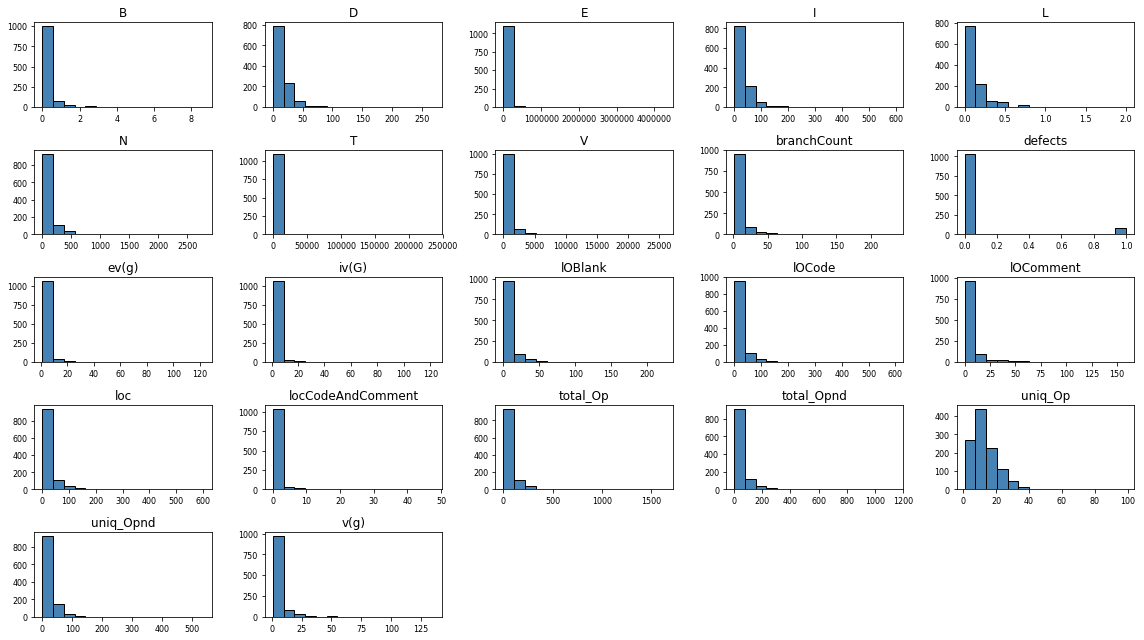

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,B,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,outlier
7,602,136,123,123,2785,25942.7,0.01,105.26,246.47,2.73064e+06,8.65,151702,600,40,2,225,99,538,1641,1144,236,-0.280648
4,505,106,41,82,2339,20696.9,0.01,75.93,272.58,1.57151e+06,6.9,87305.9,457,71,48,49,64,397,1397,942,178,-0.28012
462,152,53,1,43,2134,15811.6,0,270.66,58.42,4.27963e+06,5.27,237757,152,0,0,14,66,104,1281,853,72,-0.250955
189,253,33,13,27,1054,8002.45,0.01,72.75,109.99,582206,2.67,32344.8,218,159,35,17,47,146,602,452,51,-0.232266
165,142,73,15,60,1061,8015.42,0.02,60.04,133.5,481242,2.67,26735.6,139,0,3,8,36,152,554,507,143,-0.212089
373,144,36,1,17,1070,7270.02,0.01,87.53,83.06,636349,2.42,35352.7,102,24,42,62,29,82,575,495,71,-0.208807
391,141,36,1,17,1056,7133.16,0.01,89.75,79.48,640224,2.38,35568,99,24,42,56,29,79,567,489,71,-0.206818
845,199,58,1,2,1079,7184.21,0.02,55.52,129.4,398854,2.39,22158.5,199,0,0,16,18,83,567,512,115,-0.200564
622,141,57,42,43,951,6928.42,0.02,59.64,116.17,413206,2.31,22955.9,135,3,6,16,34,122,523,428,110,-0.188469
435,106,48,1,2,1007,5430.06,0.01,115.43,47.04,626798,1.81,34822.1,103,0,3,1,13,29,492,515,95,-0.174733


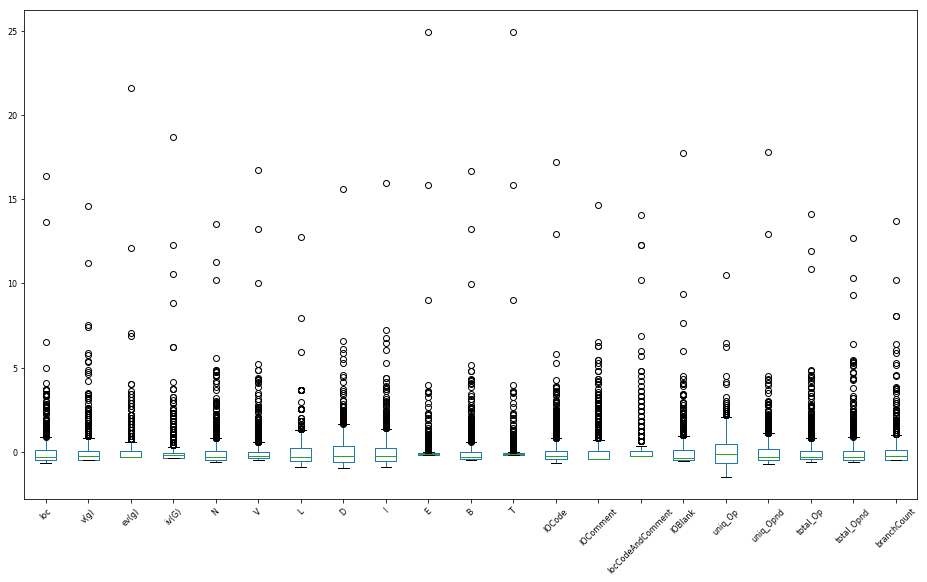

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

    did               name  similarity                            url
0   536  arsenic-male-lung       0.729   https://www.openml.org/d/536
1   316          yeast_ml8       0.654   https://www.openml.org/d/316
2   958            segment       0.629   https://www.openml.org/d/958
3   954       spectrometer       0.626   https://www.openml.org/d/954
4  1064                ar6       0.614  https://www.openml.org/d/1064
5  1442          MegaWatt1       0.613  https://www.openml.org/d/1442
6  1449         MeanWhile1       0.613  https://www.openml.org/d/1449
7  1060                ar3       0.611  https://www.openml.org/d/1060
8  1441           KungChi3       0.611  https://www.openml.org/d/1441
9  1071                mw1       0.609  https://www.openml.org/d/1071


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

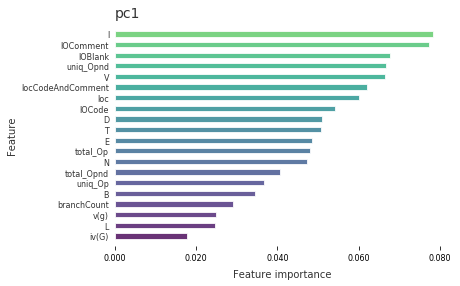

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

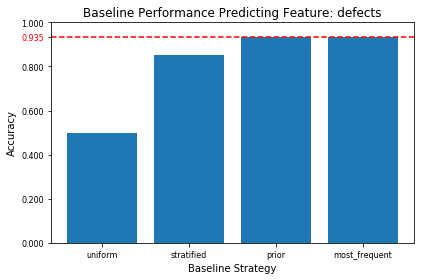

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Run already exists in OpenML, WIP


IndexError: list index out of range

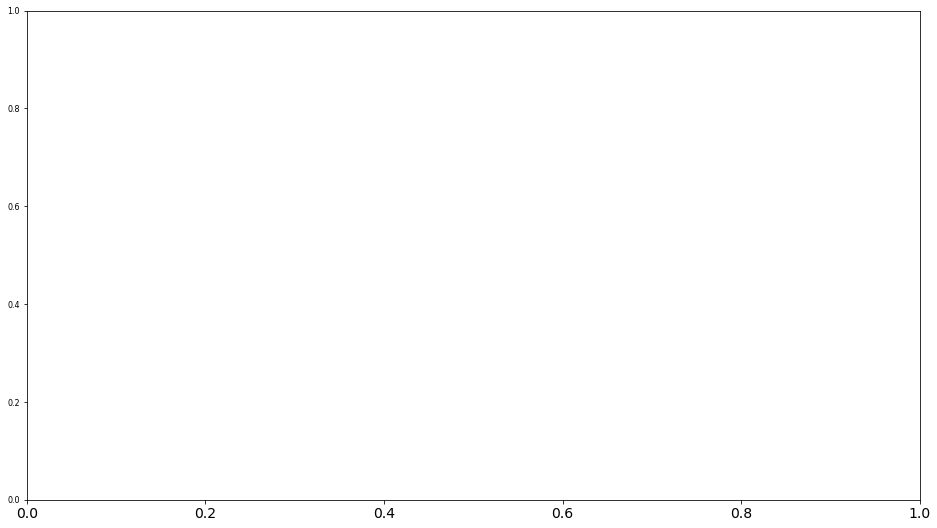

In [10]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

In [ ]:
%matplotlib nbagg
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 